In [1]:
# ResNet

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import os

# Set the GPU to be used
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[0], 'GPU')  # Assuming single GPU setup

# Directory paths
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'
test_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/testing'

# Image dimensions
IMG_SIZE = 320

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

# ResNet50 model with transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base model layers

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Optionally: Save the model
model.save('resnet_finetuned_model.h5')

# Evaluate the model on the testing set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc:.4f}')


2024-11-15 10:04:04.512738: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 10:04:04.541371: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-15 10:04:05.756547: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-15 10:04:05.785593: I external/local_

Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.


2024-11-15 10:04:07.325693: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-15 10:04:07.328812: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-15 10:04:07.331986: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

94765736/94765736 [==============================] - 7s 0us/step
Epoch 1/10


2024-11-15 10:04:29.262743: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90500


   1/6946 [..............................] - ETA: 29:32:49 - loss: 0.8521 - accuracy: 0.5625

I0000 00:00:1731665072.134999    2089 service.cc:145] XLA service 0x79f72c9b2b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731665072.135015    2089 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-15 10:04:32.138283: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731665072.177659    2089 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6946/6946 [==============================] - 1795s 256ms/step - loss: 0.5931 - accuracy: 0.6895 - val_loss: 0.6727 - val_accuracy: 0.6169
Epoch 2/10
6946/6946 [==============================] - 1801s 259ms/step - loss: 0.5527 - accuracy: 0.7229 - val_loss: 0.6741 - val_accuracy: 0.6206
Epoch 3/10
6946/6946 [==============================] - 1805s 260ms/step - loss: 0.5408 - accuracy: 0.7317 - val_loss: 0.6786 - val_accuracy: 0.6066
Epoch 4/10
6946/6946 [==============================] - 1793s 258ms/step - loss: 0.5363 - accuracy: 0.7340 - val_loss: 0.6844 - val_accuracy: 0.6031
Epoch 5/10
6946/6946 [==============================] - 1796s 259ms/step - loss: 0.5341 - accuracy: 0.7366 - val_loss: 0.6815 - val_accuracy: 0.6046
Epoch 6/10
6946/6946 [==============================] - 1794s 258ms/step - loss: 0.5295 - accuracy: 0.7400 - val_loss: 0.6325 - val_accuracy: 0.6421
Epoch 7/10
6946/6946 [==============================] - 1795s 258ms/step - loss: 0.5280 - accuracy: 0.7406 - val_loss

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 7928 images belonging to 2 classes.
247/247 [==============================] - 30s 121ms/step - loss: 0.6199 - accuracy: 0.6475
Test accuracy: 0.6475


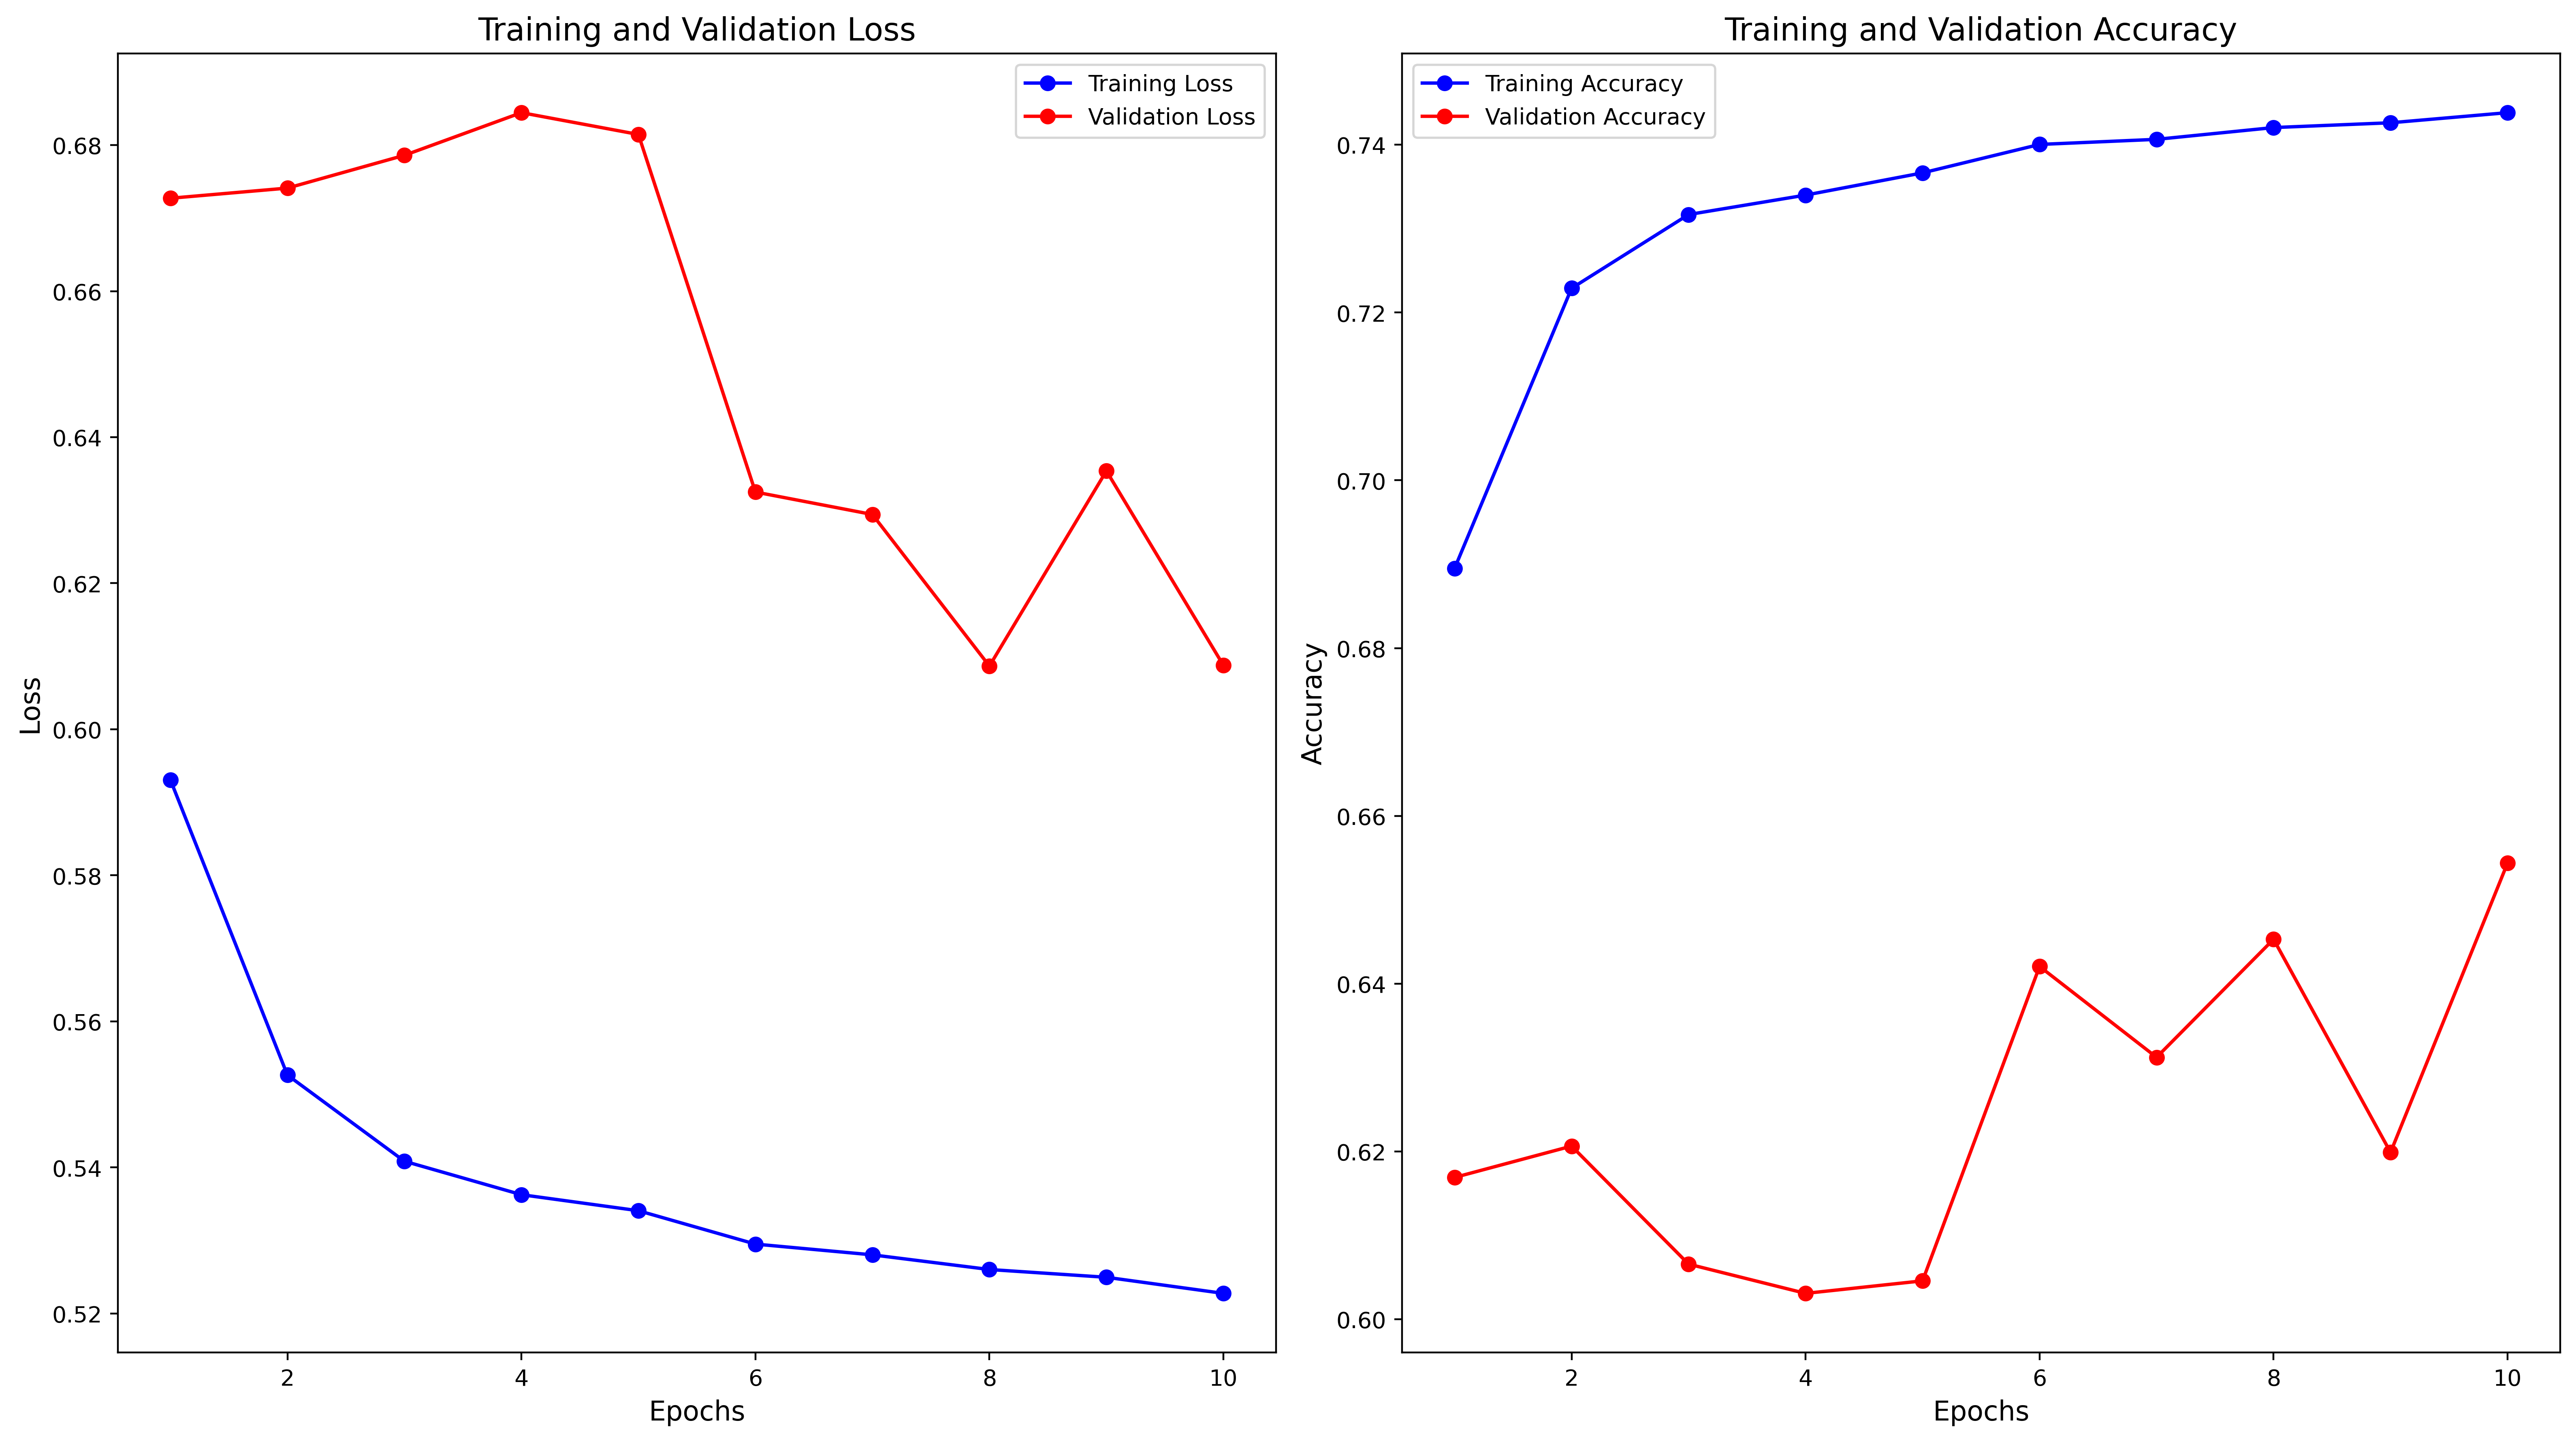

In [3]:
# Graphing Metrics

import matplotlib.pyplot as plt

# Assuming `history` contains the training history from model.fit
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(16, 9), dpi=400)  # 4K quality with 16:9 aspect ratio

# Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()

# Save the plot in 4K quality
plt.savefig('training_results_4k.png', dpi=400)  # Adjust the dpi as needed
plt.show()


In [1]:
# Efficient Net

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import optuna

# Directory paths
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'
test_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/testing'

# Image dimensions
IMG_SIZE = 320

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

# Enable logging for Optuna progress
optuna.logging.set_verbosity(optuna.logging.INFO)

# Define an objective function for Optuna
def objective(trial):
    print(f"Starting Trial {trial.number + 1}...")  # Display trial start message
    
    # Hyperparameters to tune
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.7)
    dense_units = trial.suggest_int('dense_units', 128, 512, step=64)
    
    # Build the model
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=5,  # Use fewer epochs for faster tuning
        validation_data=val_generator,
        validation_steps=val_generator.samples // val_generator.batch_size,
        verbose=1  # Show training progress for each epoch
    )

    # Log progress at the end of the trial
    val_acc = history.history['val_accuracy'][-1]
    print(f"Trial {trial.number + 1} completed with val_accuracy: {val_acc:.4f}")
    return val_acc

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # Adjust n_trials as needed

# Best hyperparameters
print("Best hyperparameters:", study.best_params)

# Train with the best hyperparameters
best_params = study.best_params

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

final_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(best_params['dense_units'], activation='relu'),
    layers.Dropout(best_params['dropout_rate']),
    layers.Dense(1, activation='sigmoid')
])

final_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

history = final_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Save the final model
final_model.save('efficientnet_optuna_tuned_model.h5')
print("Final model saved as 'efficientnet_optuna_tuned_model.h5'.")

# Plot training and validation metrics
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(train_acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('training_validation_metrics.png')  # Save the graph as an image
plt.show()


2024-11-15 15:47:05.626128: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 15:47:05.656199: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.


[I 2024-11-15 15:47:08,513] A new study created in memory with name: no-name-19a3bafb-2449-46ec-a33a-3c281fe4898c


Starting Trial 1...


/tmp/ipykernel_3663/769971672.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
/tmp/ipykernel_3663/769971672.py:57: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.7)
2024-11-15 15:47:08.688150: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-15 15:47:08.718673: I external/local_xla/xla/stream_ex

Epoch 1/5


2024-11-15 15:47:27.491164: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90500


   1/6946 [..............................] - ETA: 33:43:49 - loss: 0.7105 - accuracy: 0.5000

I0000 00:00:1731685648.342372    3800 service.cc:145] XLA service 0x7bf74487ac00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731685648.342388    3800 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-15 15:47:28.345692: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731685648.384659    3800 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6946/6946 [==============================] - 1851s 264ms/step - loss: 0.6888 - accuracy: 0.5473 - val_loss: 0.6969 - val_accuracy: 0.5032
Epoch 2/5
6946/6946 [==============================] - 1829s 263ms/step - loss: 0.6873 - accuracy: 0.5501 - val_loss: 0.6928 - val_accuracy: 0.5036
Epoch 3/5
6946/6946 [==============================] - 1832s 264ms/step - loss: 0.6864 - accuracy: 0.5506 - val_loss: 0.6937 - val_accuracy: 0.5032
Epoch 4/5
1765/6946 [======>.......................] - ETA: 22:40 - loss: 0.6870 - accuracy: 0.5469

[W 2024-11-15 17:26:47,169] Trial 0 failed with parameters: {'learning_rate': 2.0670649437716177e-05, 'dropout_rate': 0.572846313598165, 'dense_units': 256} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_3663/769971672.py", line 78, in objective
    history = model.fit(
  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1804, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_functio

KeyboardInterrupt: 

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060, compute capability 8.6


2024-11-15 17:53:12.322163: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.


2024-11-15 17:53:13.907193: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-15 17:53:13.949783: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-15 17:53:13.991573: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <gast.gast.Expr object at 0x7f329c261030>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <gast.gast.Expr object at 0x7f329c261030>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-11-15 17:53:28.845891: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
2024-11-15 17:53:29.158699: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90500


   1/6946 [..............................] - ETA: 28:54:16 - loss: 0.8232 - accuracy: 0.5938

I0000 00:00:1731693210.730226     295 service.cc:145] XLA service 0x7f31c0003ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731693210.730244     295 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-15 17:53:30.736234: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731693210.780422     292 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6946/6946 [==============================] - 1768s 252ms/step - loss: 0.2453 - accuracy: 0.9024 - val_loss: 0.3193 - val_accuracy: 0.8561
Epoch 2/10
6946/6946 [==============================] - 1753s 252ms/step - loss: 0.2097 - accuracy: 0.9179 - val_loss: 0.3514 - val_accuracy: 0.8485
Epoch 3/10
6946/6946 [==============================] - 1719s 247ms/step - loss: 0.2003 - accuracy: 0.9224 - val_loss: 0.3342 - val_accuracy: 0.8552
Epoch 4/10
6946/6946 [==============================] - 1715s 247ms/step - loss: 0.1938 - accuracy: 0.9253 - val_loss: 0.3119 - val_accuracy: 0.8655
Epoch 5/10
6946/6946 [==============================] - 1716s 247ms/step - loss: 0.1899 - accuracy: 0.9268 - val_loss: 0.3151 - val_accuracy: 0.8668
Epoch 6/10
6946/6946 [==============================] - 1715s 247ms/step - loss: 0.1856 - accuracy: 0.9282 - val_loss: 0.2985 - val_accuracy: 0.8760
Epoch 7/10
6946/6946 [==============================] - 1710s 246ms/step - loss: 0.1828 - accuracy: 0.9296 - val_loss

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


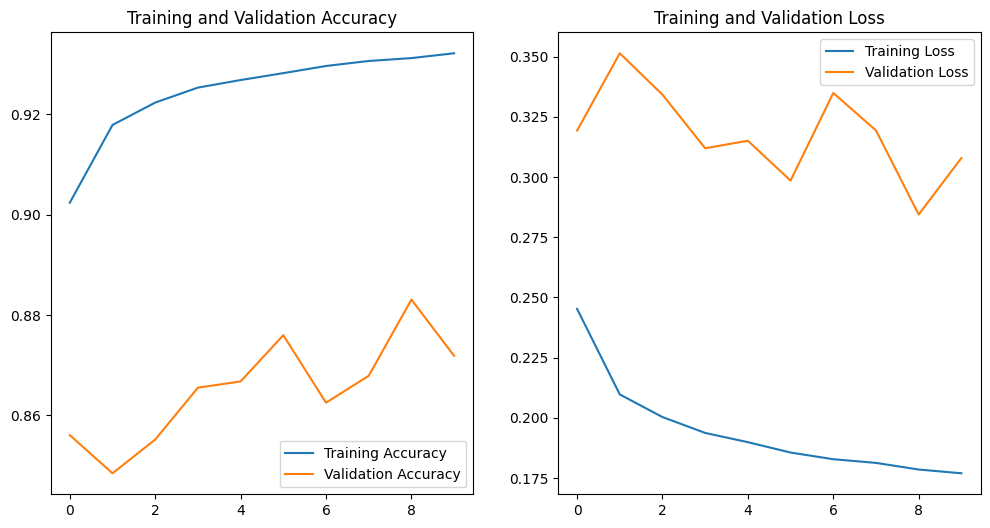

In [2]:
# MobileNet
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import numpy as np

# Mixed precision for faster training
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Directory paths
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'
test_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/testing'

# Image dimensions
IMG_SIZE = 320

# Data preprocessing with reduced augmentations for faster feedback
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

# Calculate class weights (if data is imbalanced)
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.array([0, 1]),  # Convert to numpy array
    y=np.ravel(train_generator.classes)  # Flatten the array
)

# Build MobileNetV2 model with reduced frozen layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to avoid overtraining
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    class_weight=dict(enumerate(class_weights)),  # Ensure it's passed as a dictionary
    callbacks=[early_stopping],
    verbose=1
)

# Save the final model
model.save('mobilenet_optimized_model.h5')
print("Final model saved as 'mobilenet_optimized_model.h5'.")

# Plot training and validation metrics
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(train_acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('training_validation_metrics_mobilenet.png')  # Save the graph as an image
plt.show()


Using GPU!
Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.


2024-11-16 03:11:29.362757: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-16 03:11:29.371541: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-16 03:11:29.376479: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/10


2024-11-16 03:11:36.312297: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90500
I0000 00:00:1731726696.684611     305 service.cc:145] XLA service 0x79bc3d2f4c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731726696.684633     305 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-16 03:11:36.688746: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731726696.727751     305 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6946/6946 [==============================] - 269s 38ms/step - loss: 0.3783 - accuracy: 0.8354 - val_loss: 0.4068 - val_accuracy: 0.8079
Epoch 2/10
6946/6946 [==============================] - 259s 37ms/step - loss: 0.2846 - accuracy: 0.8841 - val_loss: 0.3811 - val_accuracy: 0.8306
Epoch 3/10
6946/6946 [==============================] - 259s 37ms/step - loss: 0.2415 - accuracy: 0.9030 - val_loss: 0.3718 - val_accuracy: 0.8384
Epoch 4/10
6946/6946 [==============================] - 259s 37ms/step - loss: 0.1911 - accuracy: 0.9240 - val_loss: 0.5557 - val_accuracy: 0.7982
Epoch 5/10
6946/6946 [==============================] - 259s 37ms/step - loss: 0.1342 - accuracy: 0.9481 - val_loss: 0.5031 - val_accuracy: 0.8271
Epoch 6/10
6946/6946 [==============================] - 259s 37ms/step - loss: 0.0884 - accuracy: 0.9670 - val_loss: 0.8131 - val_accuracy: 0.8052
Epoch 7/10
6946/6946 [==============================] - 259s 37ms/step - loss: 0.0619 - accuracy: 0.9780 - val_loss: 1.1059 - val

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


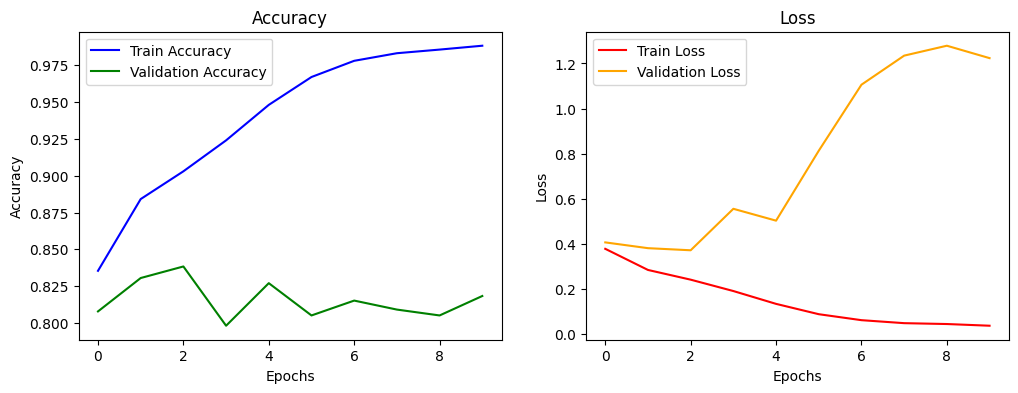

In [2]:
# CNN
import tensorflow as tf
from tensorflow.keras import layers, models
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'
test_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/testing'

# Set image size and batch size
img_size = (224, 224)
batch_size = 32
epochs = 10

# Check if GPU is available and set memory growth before any other TensorFlow operations
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    # Set memory growth for GPU before any model creation or data loading
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)  # Try this approach
        print("Using GPU!")
    except RuntimeError as e:
        print(e)
else:
    print("Using CPU!")

# Define the CNN model
def create_cnn_model(input_shape=(224, 224, 3), num_classes=2):
    model = models.Sequential()
   
    # First convolutional block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
   
    # Second convolutional block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
   
    # Third convolutional block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
   
    # Flatten the output of the last convolutional layer
    model.add(layers.Flatten())
   
    # Fully connected layer
    model.add(layers.Dense(512, activation='relu'))
   
    # Output layer for binary classification (2 classes)
    model.add(layers.Dense(num_classes, activation='softmax'))
   
    return model

# Load and preprocess data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Binary classification -> 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create the CNN model
model = create_cnn_model(input_shape=(224, 224, 3), num_classes=2)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Save the model
model.save('cnn_model.h5')

# Plotting training and validation metrics
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 4))
   
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
   
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('training_validation_metrics_CNN.png')  # Save the graph as an image

    plt.show()

# Plot the metrics
plot_metrics(history)

2024-11-16 04:07:32.975538: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 04:07:33.006193: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060, compute capability 8.6


2024-11-16 04:07:34.684390: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-16 04:07:34.720097: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-16 04:07:34.726840: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.


2024-11-16 04:07:36.353730: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-16 04:07:36.359365: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-16 04:07:36.368422: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

58889256/58889256 [==============================] - 5s 0us/step
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <gast.gast.Expr object at 0x706735d156c0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <gast.gast.Expr object at 0x706735d156c0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-11-16 04:07:50.696287: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
2024-11-16 04:07:50.864189: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90500


   1/6946 [..............................] - ETA: 21:31:20 - loss: 0.8164 - accuracy: 0.5000

I0000 00:00:1731730073.791604    1366 service.cc:145] XLA service 0x70665c003670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731730073.791626    1366 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-16 04:07:53.799036: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731730073.837808    1372 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6946/6946 [==============================] - 931s 132ms/step - loss: 0.3157 - accuracy: 0.8666 - val_loss: 0.3845 - val_accuracy: 0.8201
Epoch 2/10
6946/6946 [==============================] - 909s 131ms/step - loss: 0.2776 - accuracy: 0.8863 - val_loss: 0.3323 - val_accuracy: 0.8563
Epoch 3/10
6946/6946 [==============================] - 910s 131ms/step - loss: 0.2652 - accuracy: 0.8916 - val_loss: 0.3398 - val_accuracy: 0.8564
Epoch 4/10
6946/6946 [==============================] - 914s 132ms/step - loss: 0.2564 - accuracy: 0.8963 - val_loss: 0.3329 - val_accuracy: 0.8551
Epoch 5/10
6946/6946 [==============================] - 913s 131ms/step - loss: 0.2504 - accuracy: 0.8988 - val_loss: 0.3142 - val_accuracy: 0.8658
Epoch 6/10
6946/6946 [==============================] - 910s 131ms/step - loss: 0.2455 - accuracy: 0.9014 - val_loss: 0.3157 - val_accuracy: 0.8658
Epoch 7/10
6946/6946 [==============================] - 913s 131ms/step - loss: 0.2406 - accuracy: 0.9031 - val_loss: 0.304

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


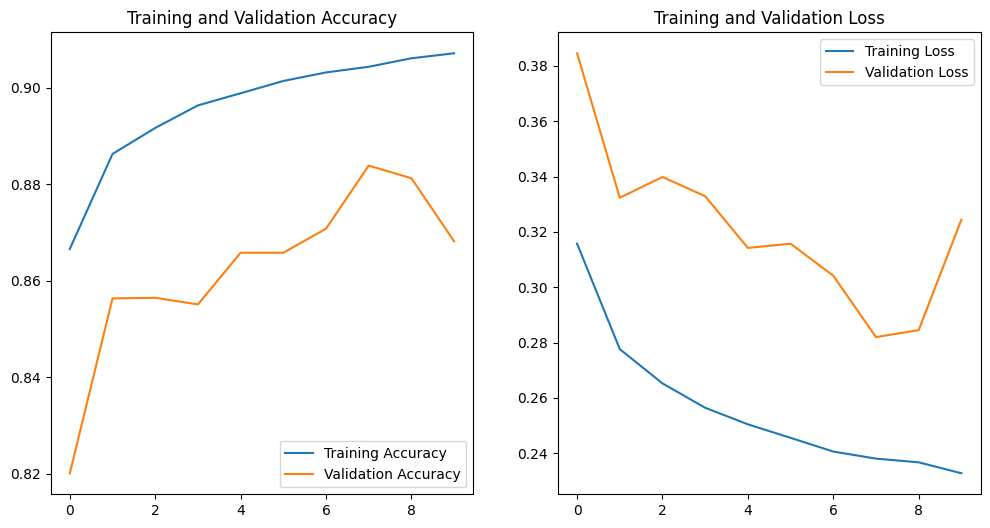

In [1]:
# VGG 16

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import numpy as np

# Mixed precision for faster training
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Directory paths
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'
test_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/testing'

# Image dimensions
IMG_SIZE = 224  # Standard input size for VGG16

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

# Calculate class weights (if data is imbalanced)
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.array([0, 1]),
    y=np.ravel(train_generator.classes)
)

# Build VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze pre-trained layers

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    class_weight=dict(enumerate(class_weights)),
    callbacks=[early_stopping],
    verbose=1
)

# Save the final model
model.save('vgg16_model.h5')
print("Model saved as 'vgg16_model.h5'.")

# Plot training and validation metrics
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(train_acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('vgg16_training_validation_metrics.png')  # Save the graph as an image
plt.show()


Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.
Epoch 1/10


2024-11-16 07:15:32.935635: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90500
I0000 00:00:1731741333.874839    3963 service.cc:145] XLA service 0x7d0fcc414d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731741333.874856    3963 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-16 07:15:33.878297: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731741333.917409    3963 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6947/6947 [==============================] - ETA: 0s - loss: 0.3720 - accuracy: 0.8406

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6947/6947 [==============================] - 913s 130ms/step - loss: 0.3720 - accuracy: 0.8406 - val_loss: 0.4478 - val_accuracy: 0.7936
Epoch 2/10
6947/6947 [==============================] - 895s 129ms/step - loss: 0.2996 - accuracy: 0.8767 - val_loss: 0.4746 - val_accuracy: 0.7753
Epoch 3/10
6947/6947 [==============================] - 896s 129ms/step - loss: 0.2744 - accuracy: 0.8889 - val_loss: 0.5071 - val_accuracy: 0.7492
Epoch 4/10
6947/6947 [==============================] - 906s 130ms/step - loss: 0.2554 - accuracy: 0.8970 - val_loss: 0.3621 - val_accuracy: 0.8519
Epoch 5/10
6947/6947 [==============================] - 903s 130ms/step - loss: 0.2413 - accuracy: 0.9036 - val_loss: 0.3659 - val_accuracy: 0.8477
Epoch 6/10
6947/6947 [==============================] - 903s 130ms/step - loss: 0.2305 - accuracy: 0.9086 - val_loss: 0.3314 - val_accuracy: 0.8594
Epoch 7/10
6947/6947 [==============================] - 904s 130ms/step - loss: 0.2228 - accuracy: 0.9118 - val_loss: 0.352

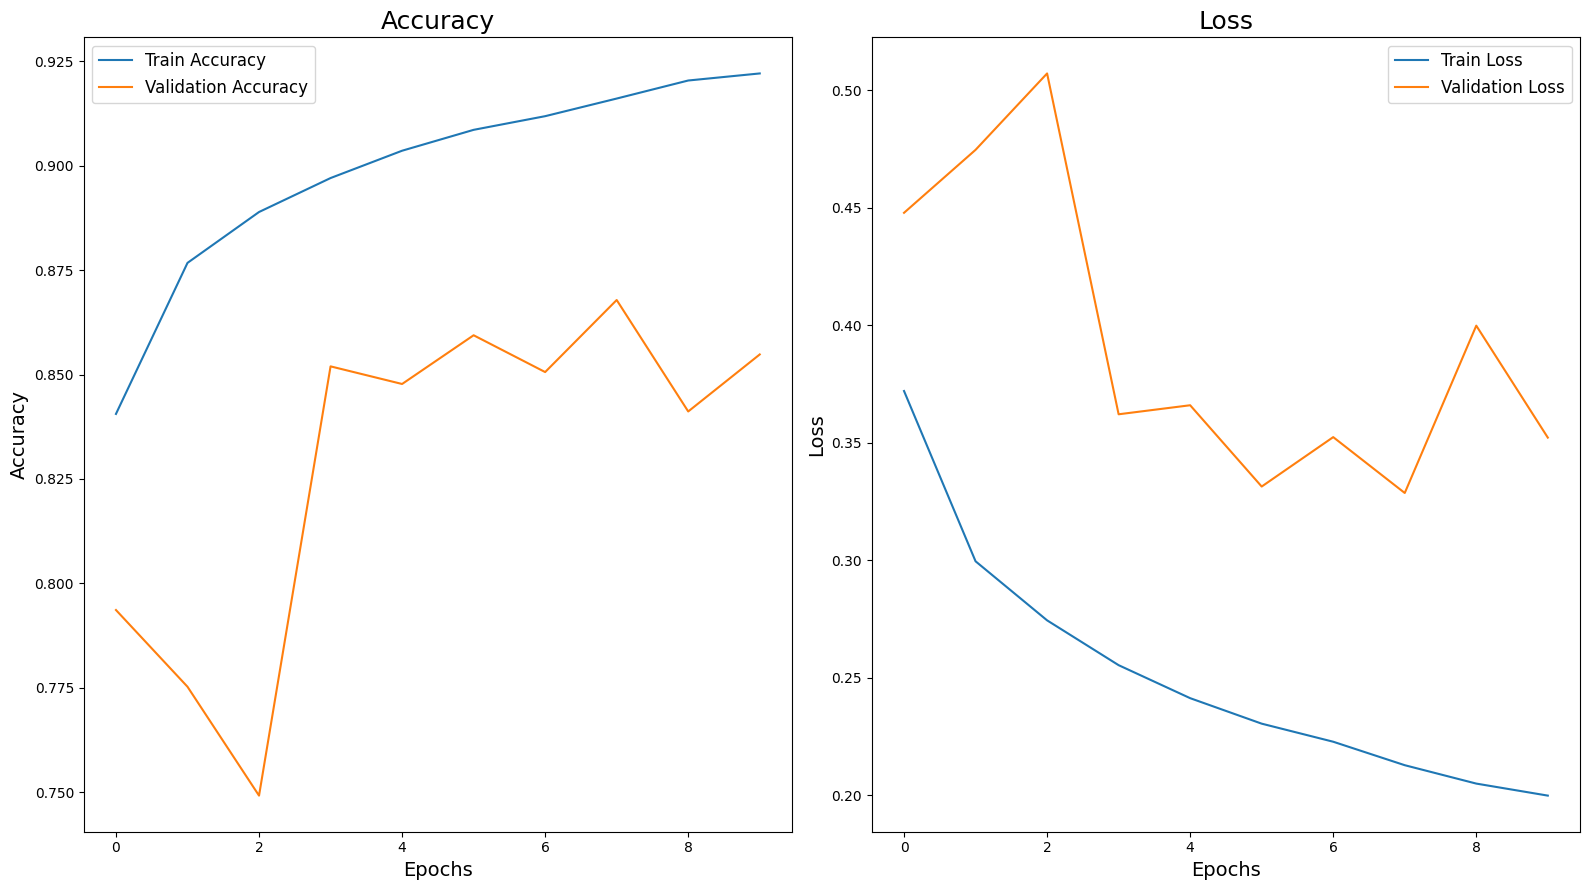

In [2]:
# AlexNet

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directory paths
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'
test_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/testing'

# Parameters
IMG_SIZE = (227, 227)  # AlexNet standard input size
BATCH_SIZE = 32
EPOCHS = 10

# Data Augmentation and Generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=15)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Build AlexNet Model
def alexnet_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Compile Model
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
alexnet = alexnet_model(input_shape)
alexnet.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('alexnet_best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss', mode='min')

# Train Model
history = alexnet.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]
)

# Plot and Save Results
plt.figure(figsize=(16, 9))  # Adjust for 4K aspect ratio (16:9)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()

# Save the plot as a 4K resolution image
plt.savefig('alexnet_training_graphs_4k.png', dpi=300)  # 4K quality (300 DPI)
plt.show()

Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.


2024-11-16 09:56:34.006803: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-16 09:56:34.015085: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-16 09:56:34.023700: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

87910968/87910968 [==============================] - 7s 0us/step
Epoch 1/10


2024-11-16 09:57:02.126244: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90500


   1/6947 [..............................] - ETA: 39:52:41 - loss: 0.6315 - accuracy: 0.6562

I0000 00:00:1731751025.100795    5353 service.cc:145] XLA service 0x7c9a6494f7c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731751025.100811    5353 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-16 09:57:05.104074: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731751025.145130    5353 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6947/6947 [==============================] - 1689s 240ms/step - loss: 0.2359 - accuracy: 0.9061 - val_loss: 0.3104 - val_accuracy: 0.8642
Epoch 2/10
6947/6947 [==============================] - 1662s 239ms/step - loss: 0.2053 - accuracy: 0.9193 - val_loss: 0.2600 - val_accuracy: 0.8889
Epoch 3/10
6947/6947 [==============================] - 1662s 239ms/step - loss: 0.1951 - accuracy: 0.9236 - val_loss: 0.2913 - val_accuracy: 0.8750
Epoch 4/10
6947/6947 [==============================] - 1663s 239ms/step - loss: 0.1896 - accuracy: 0.9266 - val_loss: 0.2540 - val_accuracy: 0.8886
Epoch 5/10
6947/6947 [==============================] - 1661s 239ms/step - loss: 0.1865 - accuracy: 0.9276 - val_loss: 0.2359 - val_accuracy: 0.8982
Epoch 6/10
6947/6947 [==============================] - 1664s 239ms/step - loss: 0.1826 - accuracy: 0.9294 - val_loss: 0.2467 - val_accuracy: 0.8955
Epoch 7/10
6947/6947 [==============================] - 1664s 240ms/step - loss: 0.1786 - accuracy: 0.9312 - val_loss

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


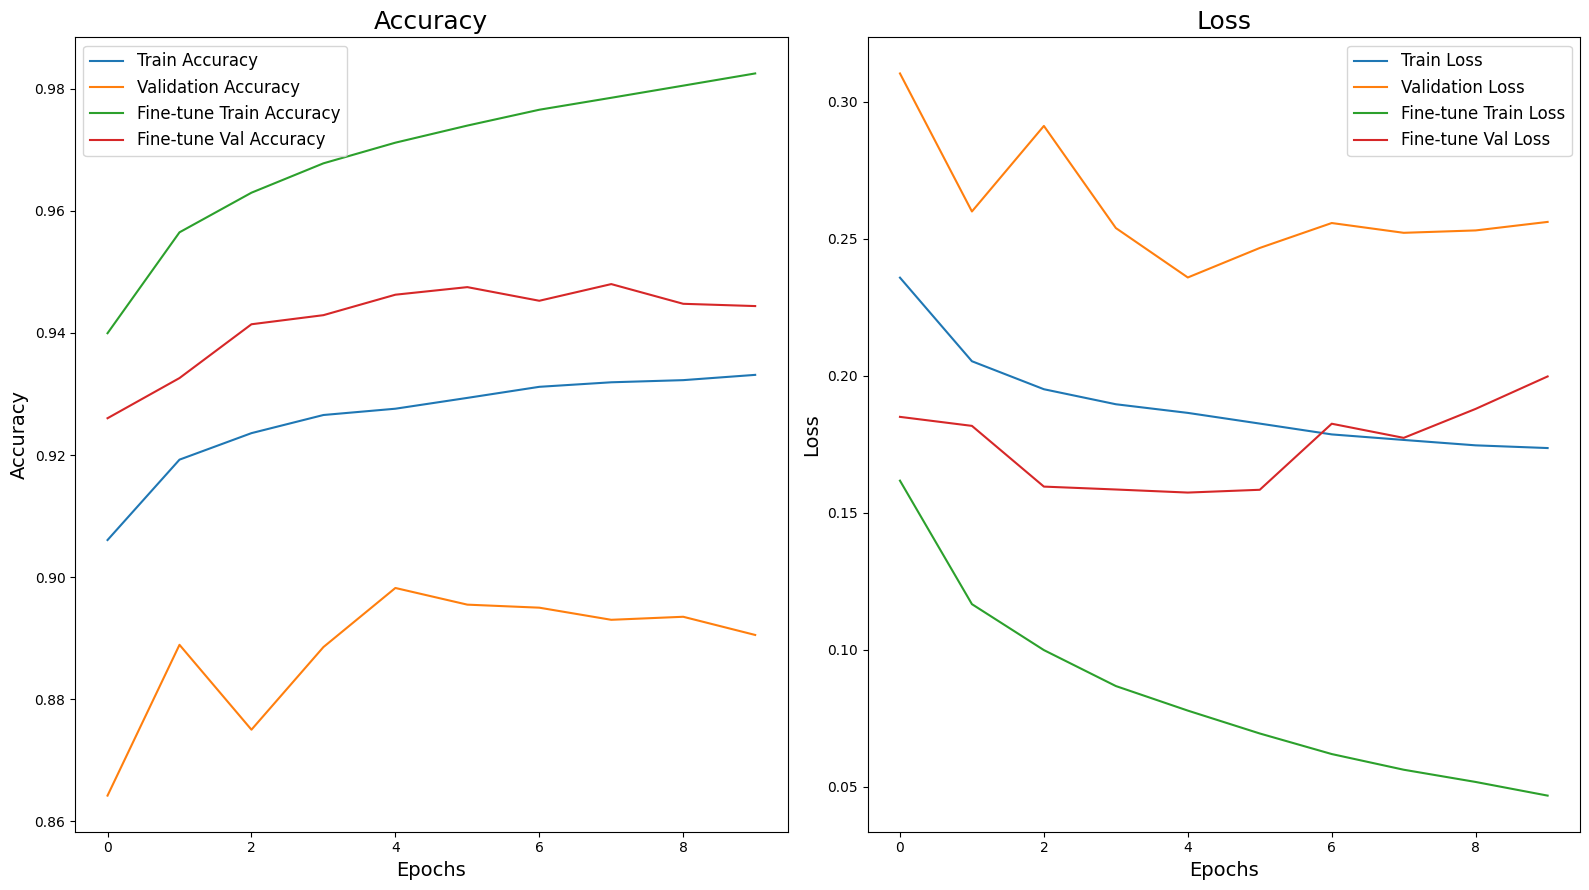

In [2]:
# Inception (GoogleNet)

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os

# Directory paths
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'
test_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/testing'

# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(299, 299),
                                              batch_size=32, class_mode='binary')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(299, 299),
                                          batch_size=32, class_mode='binary')

# Load InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze base model
base_model.trainable = False

# Add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Unfreeze base model and fine-tune
base_model.trainable = True
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Save the model
model.save('googlenet_binary_classifier.h5')

# Plot training history
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_finetune.history['accuracy'], label='Fine-tune Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Fine-tune Val Accuracy')
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_finetune.history['loss'], label='Fine-tune Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Fine-tune Val Loss')
plt.title('Loss', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig('googlenet_training_graphs_4k.png', dpi=300)
plt.show()


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2024-11-17 08:18:17.049358: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 08:18:17.079422: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  1


2024-11-17 08:18:18.319656: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-17 08:18:18.351319: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-17 08:18:18.358878: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d_1  (None, 1056)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout (Dropout)           (None, 1056)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               135296    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None

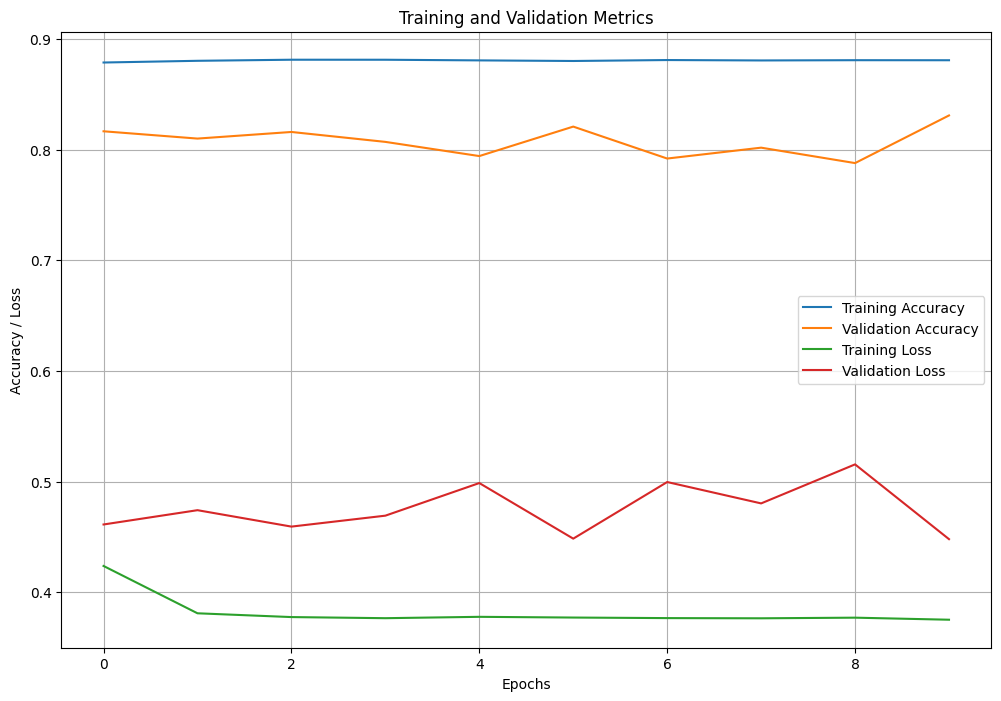

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


252/252 [==============================] - 12s 46ms/step - loss: 0.4482 - accuracy: 0.8306
Validation Accuracy: 0.83
Validation Loss: 0.45


In [2]:
# NASNetMobile

import tensorflow as tf
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Paths to training and validation data
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'

# Image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary'
)

# Load NASNetMobile without the top layer
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the model with regularization and dropout
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout for regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    Dropout(0.5),  # Additional dropout
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))  # L2 regularization for output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Plot training metrics
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid()
plt.savefig("nasnet_training_metrics_4k.png", dpi=300)
plt.show()

# Save the model
model.save('/workspace/nasnet_binary_classification_with_regularization.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {test_accuracy:.2f}")
print(f"Validation Loss: {test_loss:.2f}")


Found 222275 images belonging to 2 classes.
Found 8058 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                    

2024-11-17 08:19:58.596828: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-17 08:19:58.615256: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-17 08:19:58.629993: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/10


2024-11-17 08:20:05.482089: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90500
I0000 00:00:1731831605.883446    2480 service.cc:145] XLA service 0x79e2c04693c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731831605.883461    2480 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-17 08:20:05.886781: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731831605.924387    2480 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6946/6946 [==============================] - 119s 16ms/step - loss: 0.4861 - accuracy: 0.7715 - val_loss: 0.5410 - val_accuracy: 0.7443
Epoch 2/10
6946/6946 [==============================] - 110s 16ms/step - loss: 0.4373 - accuracy: 0.8019 - val_loss: 0.5997 - val_accuracy: 0.7082
Epoch 3/10
6946/6946 [==============================] - 109s 16ms/step - loss: 0.4234 - accuracy: 0.8100 - val_loss: 0.6518 - val_accuracy: 0.6495
Epoch 4/10
6946/6946 [==============================] - 110s 16ms/step - loss: 0.4114 - accuracy: 0.8164 - val_loss: 0.5608 - val_accuracy: 0.7389
Epoch 5/10
6946/6946 [==============================] - 110s 16ms/step - loss: 0.4052 - accuracy: 0.8196 - val_loss: 0.5180 - val_accuracy: 0.7494
Epoch 6/10
6946/6946 [==============================] - 110s 16ms/step - loss: 0.3976 - accuracy: 0.8240 - val_loss: 0.7090 - val_accuracy: 0.6795
Epoch 7/10
6946/6946 [==============================] - 110s 16ms/step - loss: 0.3926 - accuracy: 0.8263 - val_loss: 0.6005 - val

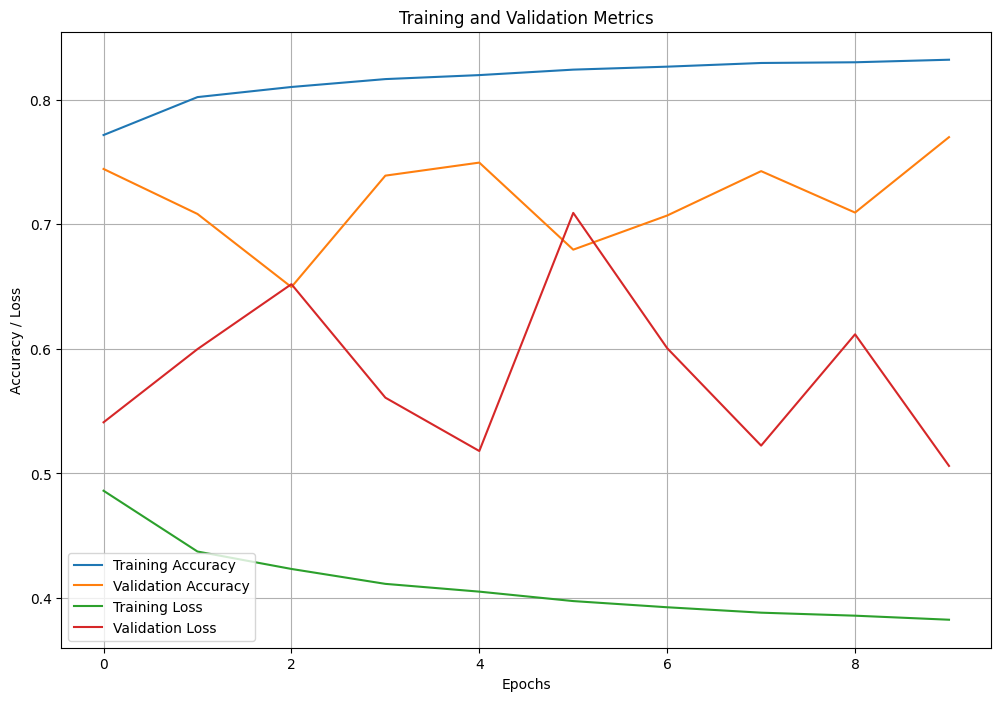

 13/252 [>.............................] - ETA: 2s - loss: 0.5086 - accuracy: 0.7740

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


252/252 [==============================] - 2s 9ms/step - loss: 0.5056 - accuracy: 0.7699
Validation Accuracy: 0.77
Validation Loss: 0.51


In [2]:
# LeNet

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths to training and validation data
train_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/training'
val_dir = '/workspace/nudenet/NudeNet_Classifier_train_data_x320/preprocessed/nude_sexy_safe_v1_x320/validation'

# Image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(32, 32),  # LeNet's original input size is 32x32
    batch_size=32, 
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, 
    target_size=(32, 32),
    batch_size=32, 
    class_mode='binary'
)

# Build the LeNet model
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Plot training metrics
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid()
plt.savefig("lenet_training_metrics_4k.png", dpi=300)
plt.show()

# Save the model
model.save('/workspace/lenet_binary_classification.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {test_accuracy:.2f}")
print(f"Validation Loss: {test_loss:.2f}")
